In [1]:
#importation of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('card_transdata.csv')

In [4]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [6]:
df[['fraud']].value_counts()

fraud
0.0      912597
1.0       87403
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


In [8]:
df_fraud = df.loc[df['fraud']==1]
df_fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


In [9]:
#a quick look at mean value of the features for fraudulent and non-fraudulent transactions
df.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225
1.0,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


<Axes: xlabel='fraud', ylabel='count'>

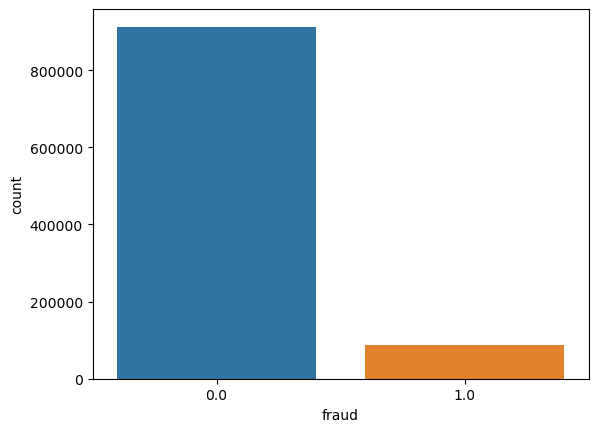

In [10]:
#visualizing the count plot and the unbalanced nature of the dataset
sns.countplot(x = 'fraud', data = df)

In [11]:
#correlation of each of the variables with fraud
df.corr()['fraud'].sort_values()

used_pin_number                  -0.100293
used_chip                        -0.060975
repeat_retailer                  -0.001357
distance_from_last_transaction    0.091917
distance_from_home                0.187571
online_order                      0.191973
ratio_to_median_purchase_price    0.462305
fraud                             1.000000
Name: fraud, dtype: float64

<Axes: >

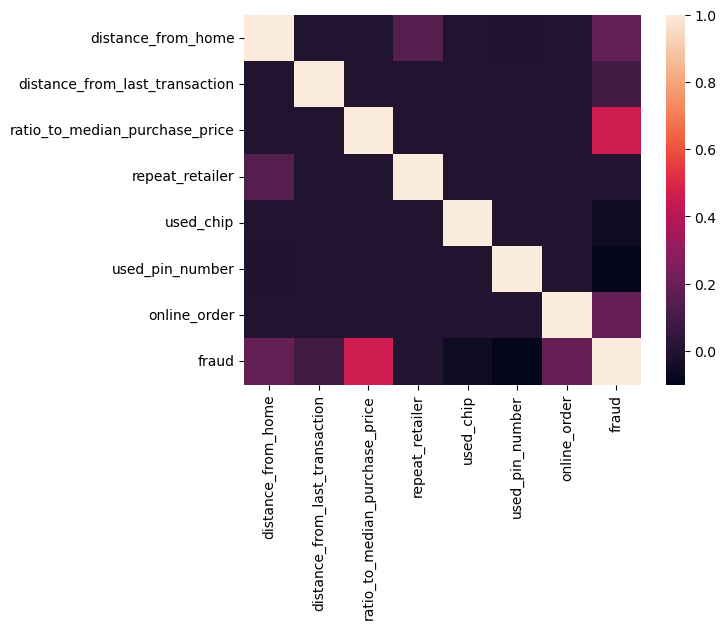

In [12]:
sns.heatmap(df.corr())

<Axes: >

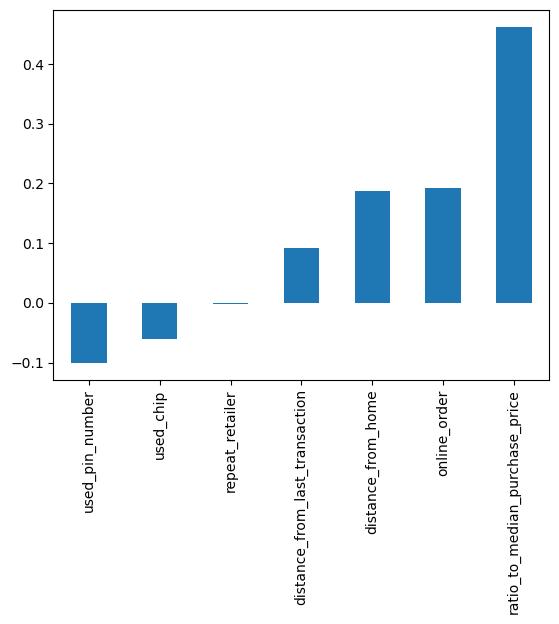

In [13]:
#visualize the correlation
df.corr()['fraud'][:-1].sort_values().plot(kind='bar')

<Axes: xlabel='fraud', ylabel='ratio_to_median_purchase_price'>

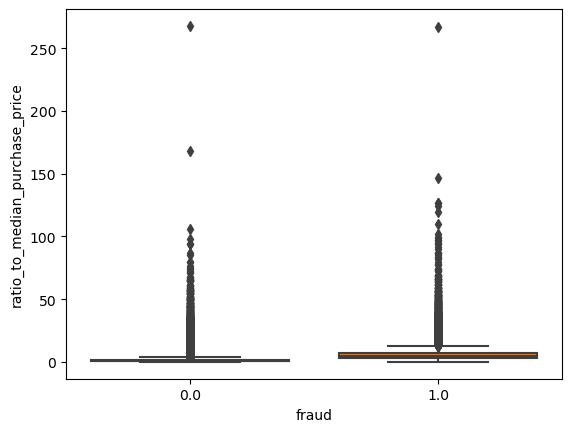

In [14]:
#ration to median purchase price higher for fraudulent transactions
sns.boxplot(x='fraud',y='ratio_to_median_purchase_price',data=df)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('fraud', axis=1)
y = df['fraud']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 43)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trained_transformed = scaler.fit_transform(X_train)
columns = X.columns
X_trained_transformed = pd.DataFrame(X_trained_transformed, columns = columns)
X_trained_transformed.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.211056,-0.094865,1.992367,0.366168,-0.735005,-0.334095,0.732968
1,-0.381153,0.930823,1.836468,0.366168,1.360535,-0.334095,0.732968
2,-0.262578,-0.205536,-0.545305,0.366168,-0.735005,-0.334095,0.732968
3,-0.204920,-0.151519,0.142076,0.366168,-0.735005,-0.334095,-1.364316
4,-0.234033,-0.227503,-0.546827,0.366168,-0.735005,-0.334095,0.732968


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel = LogisticRegression(max_iter = 200)

In [21]:
logmodel.fit(X_trained_transformed,y_train)

LogisticRegression(max_iter=200)

In [22]:
X_test_transformed = scaler.transform(X_test)
columns = X.columns
X_test_transformed = pd.DataFrame(X_test_transformed, columns = columns)
X_test_transformed.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,1.559393,-0.222628,1.788491,0.366168,1.360535,-0.334095,0.732968
1,-0.322869,-0.216238,0.103321,0.366168,-0.735005,-0.334095,0.732968
2,-0.341000,-0.223533,0.309806,0.366168,1.360535,-0.334095,0.732968
3,-0.347664,-0.118146,0.771869,0.366168,-0.735005,-0.334095,0.732968
4,-0.388108,0.205750,-0.130159,-2.730988,1.360535,-0.334095,0.732968


In [23]:
predictions = logmodel.predict(X_test_transformed)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273810
         1.0       0.89      0.61      0.72     26190

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000



In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273810
         1.0       0.89      0.61      0.72     26190

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000



In [27]:
accuracy_score(y_test, predictions)

0.95917

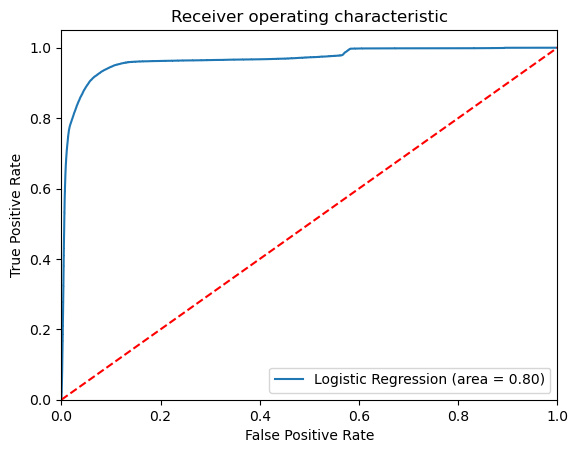

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test_transformed))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test_transformed)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()